In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from neotecreactions.models.regression_models import LinRegModel, WeightedLinRegModel, RidgeModel, LassoModel, SVRModel, RFModel, GaussianProcessModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from neotecreactions.models.metrics import Metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score

from rdkit import Chem
from rdkit.Chem.Draw import MolsMatrixToGridImage, MolsToGridImage
from IPython.display import display

In [114]:
# Read the joined dataset with the ratios
df = pd.read_csv('df_full_complete.csv', sep=';')
smiles = df['smiles_react']
smiles_lig = df['smiles_ligand']
df = df.select_dtypes(exclude=['object'])  
#react_cols = df.columns[list(map(lambda x: '_react' in x, df.columns))]

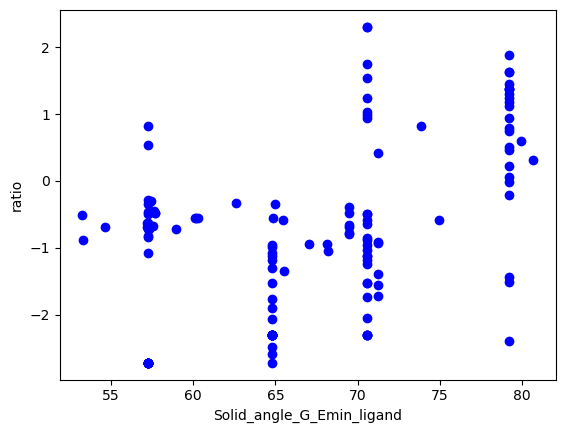

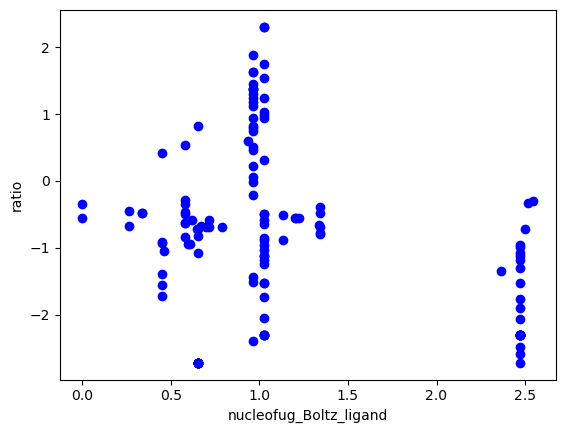

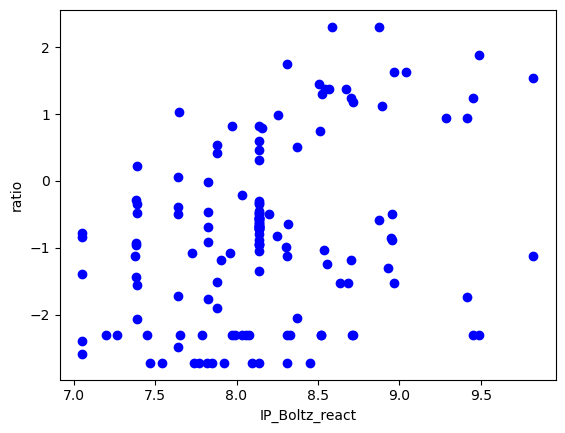

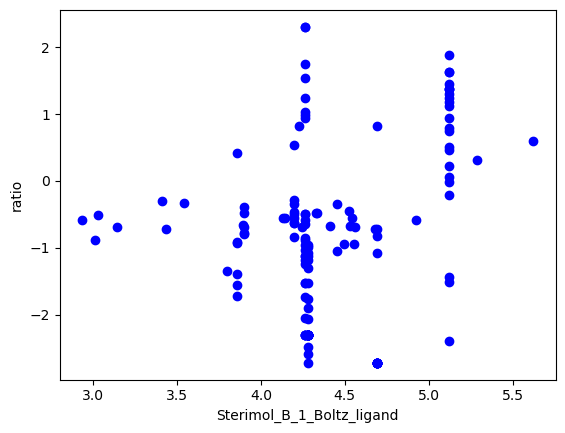

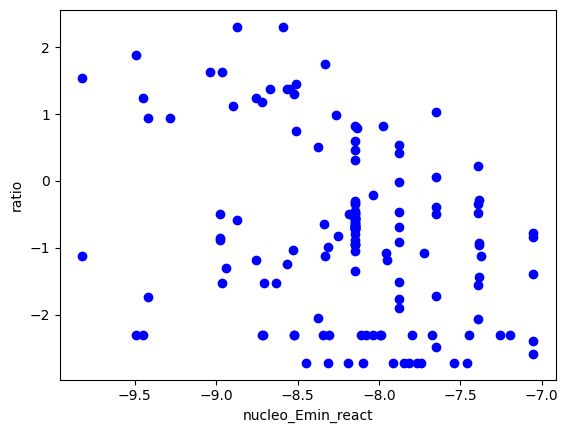

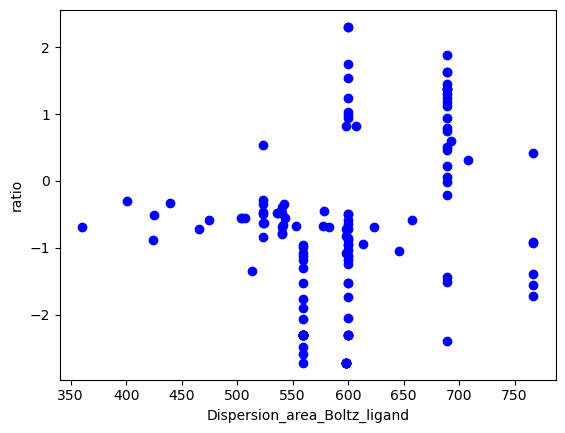

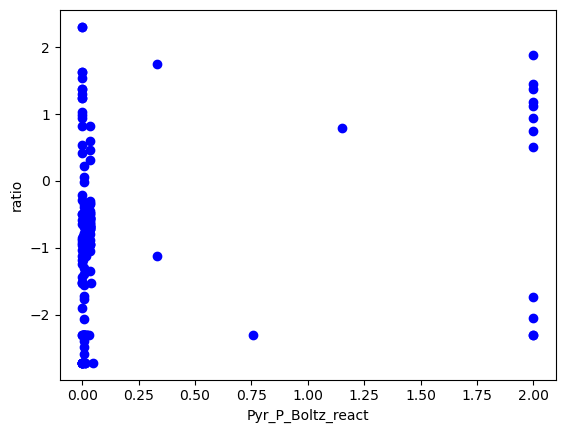

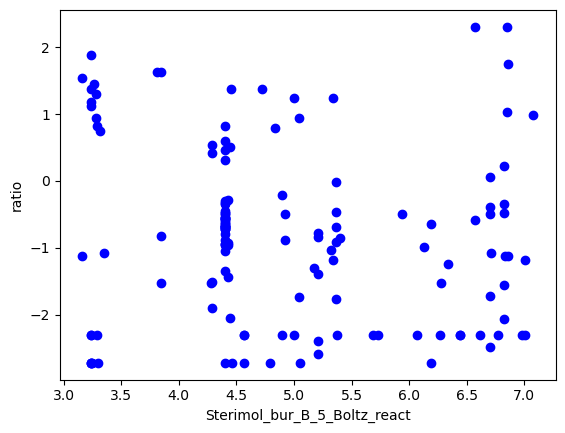

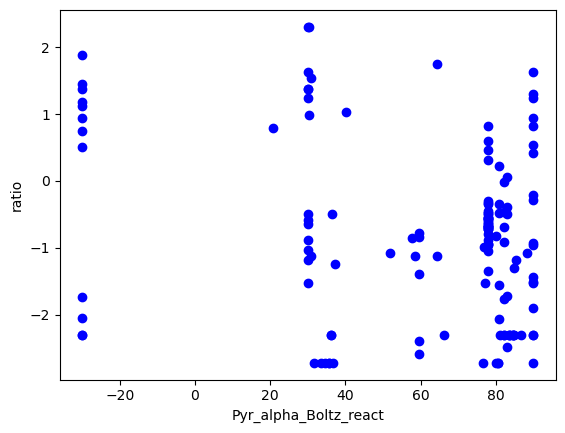

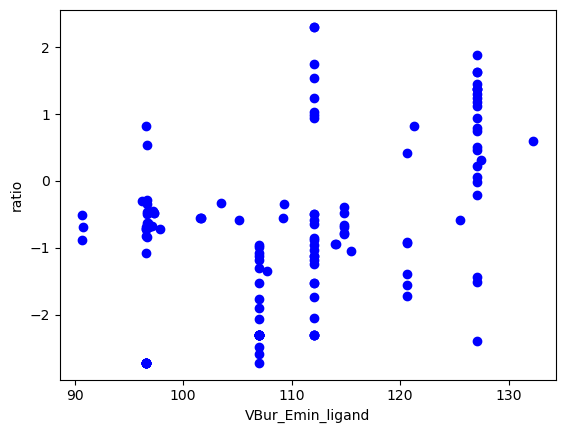

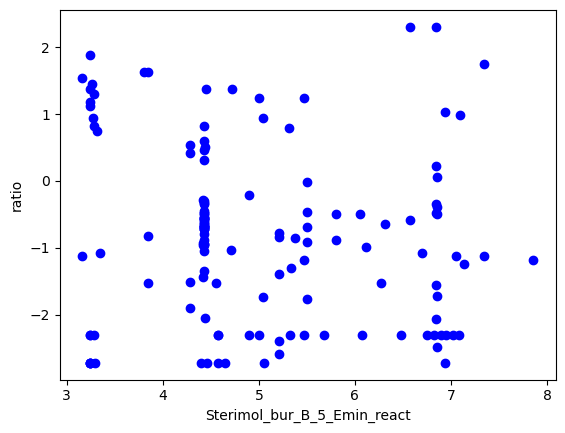

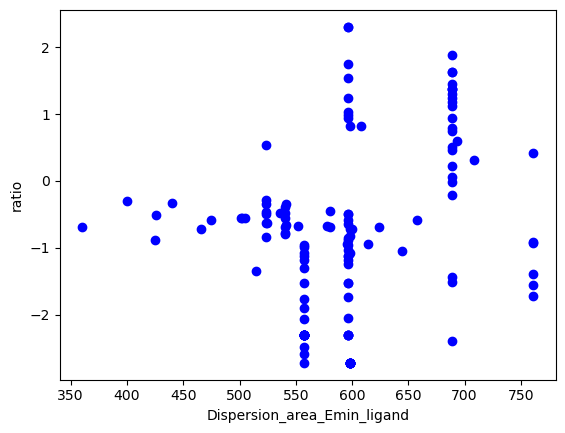

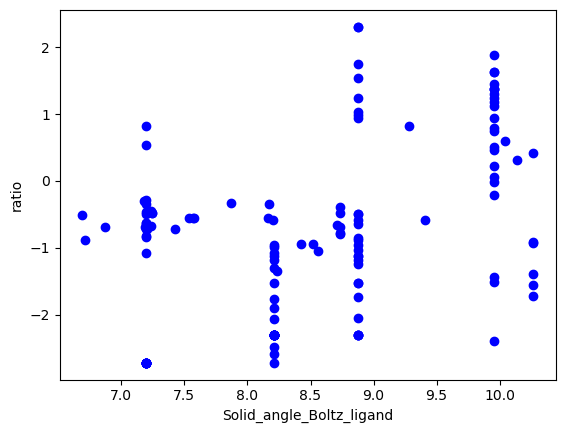

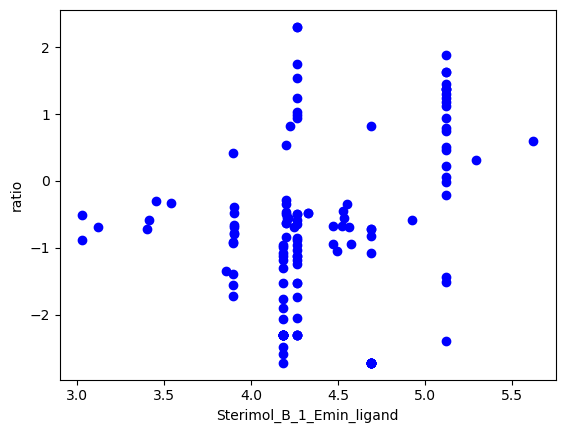

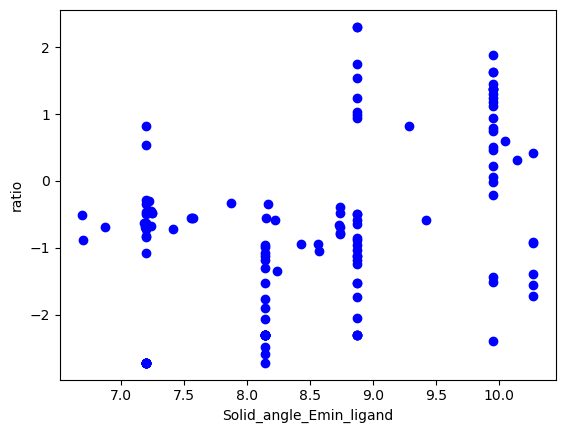

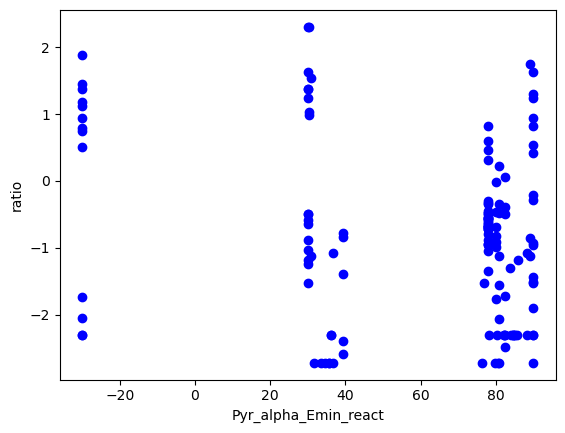

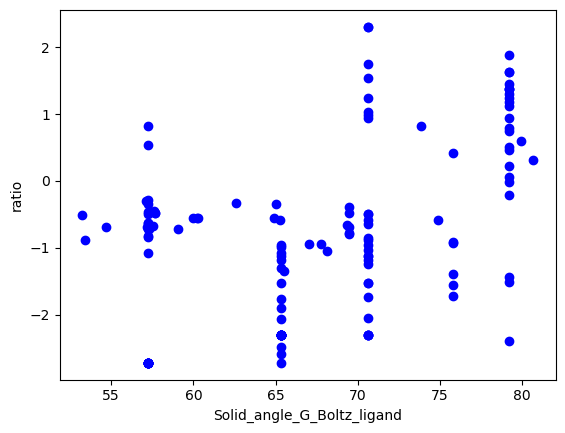

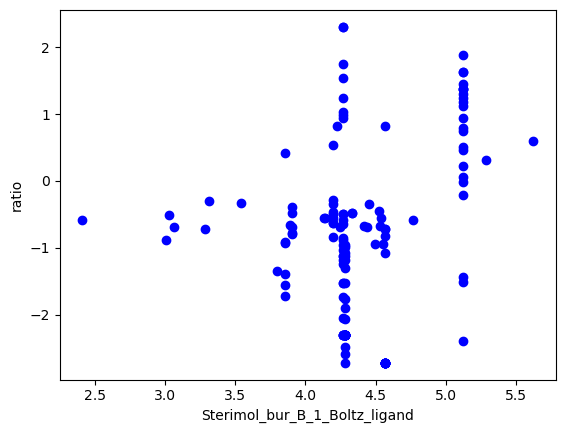

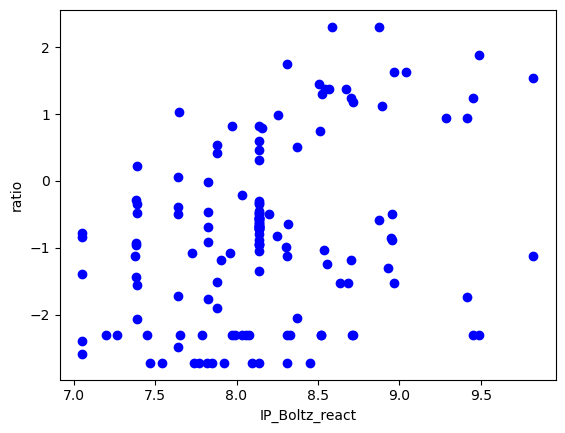

In [115]:
def plot_two_vars(df, v1, v2):
    plt.figure()
    plt.plot(df[v1], df[v2], linestyle='None', marker='o', color='blue')
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.show()

feature_var = ['Solid_angle_G_Emin_ligand', 'nucleofug_Boltz_ligand', 'IP_Boltz_react', 'Sterimol_B_1_Boltz_ligand', 'nucleo_Emin_react', 'Dispersion_area_Boltz_ligand', 'Pyr_P_Boltz_react', 'Sterimol_bur_B_5_Boltz_react', 'Pyr_alpha_Boltz_react', 'VBur_Emin_ligand', 'Sterimol_bur_B_5_Emin_react', 'Dispersion_area_Emin_ligand', 'Solid_angle_Boltz_ligand', 'Sterimol_B_1_Emin_ligand', 'Solid_angle_Emin_ligand', 'Pyr_alpha_Emin_react', 'Solid_angle_G_Boltz_ligand', 'Sterimol_bur_B_1_Boltz_ligand']
for x in feature_var:
    plot_two_vars(df, x, 'ratio')
plot_two_vars(df, 'IP_Boltz_react', 'ratio')

In [123]:
def draw_grid(smiles):
        """Plot a list of SMILES using rdkit."""
        smiles = list(map(Chem.MolFromSmiles, smiles))
        plot_mat = [smiles]
        img = MolsMatrixToGridImage(molsMatrix=plot_mat, maxMols=200)
        display(img)
        #img.save('clust.png', format='png')

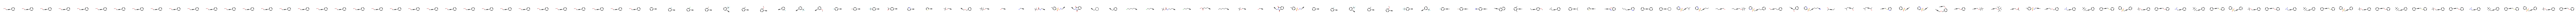

In [124]:
draw_grid(smiles)

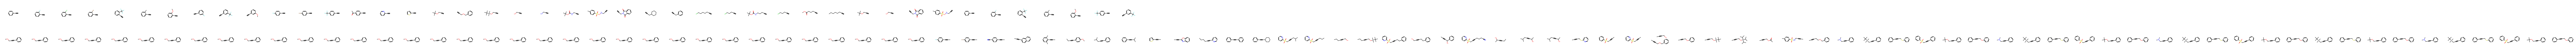

In [125]:
def draw_grid(smiles, labels):
        """Plot a list of SMILES using rdkit."""
        smiles = np.array(list(map(Chem.MolFromSmiles, smiles)))
        plot_mat = []
        for i in range(len(set(labels))):
            idx = np.where(labels == i)[0]
            #print(list(idx))
            plot_mat.append(list(smiles[idx]))
        img = MolsMatrixToGridImage(molsMatrix=plot_mat, maxMols=200)
        display(img)
        #img.save('clust.png', format='png')

sub = Chem.MolFromSmiles('CC#CC')
mols = [Chem.MolFromSmiles(x) for x in smiles]
internal = [int(len(m.GetSubstructMatches(sub)) > 0)  for m in mols]
labels = np.array(internal)
df['labels'] = labels

draw_grid(smiles, labels)

In [119]:
#idx = np.where(labels == i)[0]
labels_type = np.array(['Carbene'] * len(smiles_lig))
#labels_type = np.zeros(len(smiles_lig))
idx = list(map(lambda x: 'P' in x, smiles_lig))
labels_type[idx] = 'Phosphine'
#labels_type[idx] = 1
#draw_grid(smiles_lig, labels_type)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


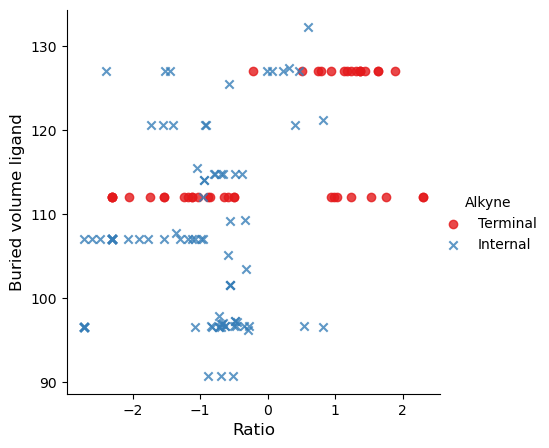

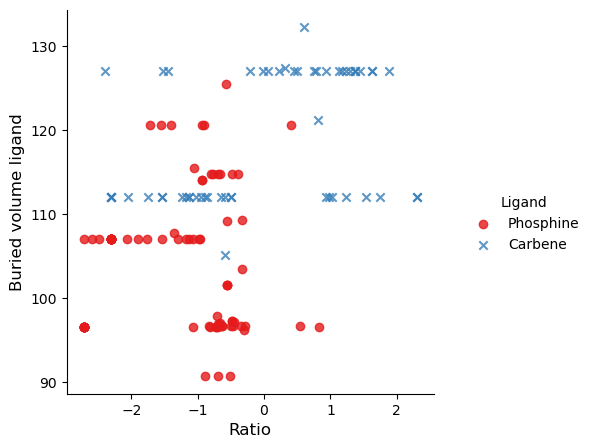

In [129]:
import seaborn as sns

y_col = "VBur_Emin_ligand"
y_label = "Buried volume ligand"

new_labels = ["Terminal", "Internal"]
new_labels_type = ["Phosphine", "Carbene"]

lm = sns.lmplot(x="ratio", y=y_col, hue="labels", data=df, markers=["o", "x"], palette="Set1", fit_reg=False)
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel(y_label, size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)
    
lm = sns.lmplot(x="ratio", y=y_col, hue="labels_type", data=df, markers=["o", "x"], palette="Set1", fit_reg=False)
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel(y_label, size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Ligand')
for t, l in zip(lm._legend.texts, new_labels_type):
    t.set_text(l)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


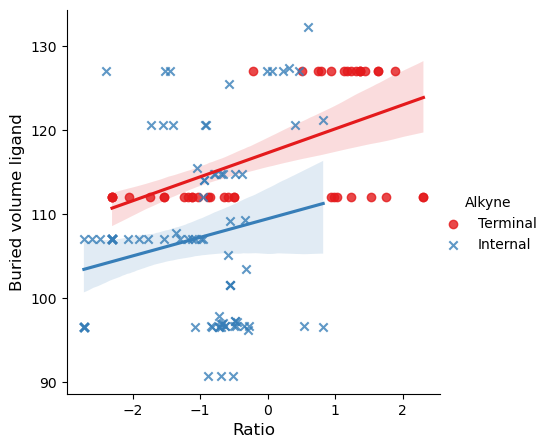

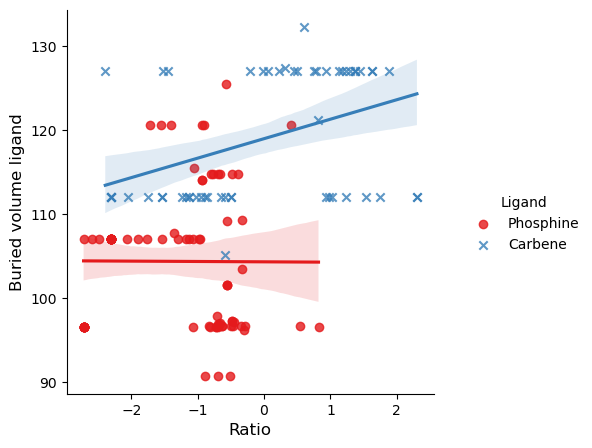

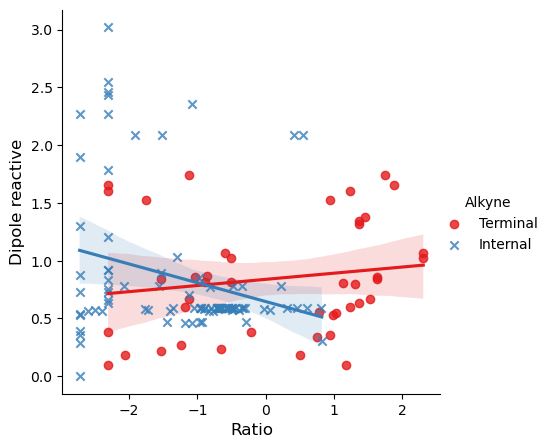

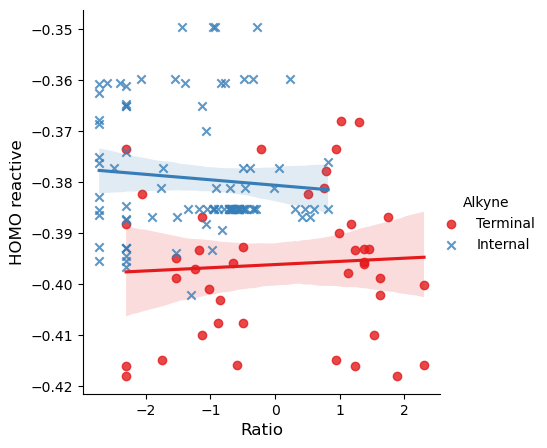

In [131]:
import seaborn as sns
orig = df['ratio']
preds = [-1.9648432158077005, -0.7225444949651587, -0.45821283437116334, -0.5486168196768471, 2.2567290273591425, -0.5419136397011464, -2.6964958703306348, 0.04878767612880819, -2.3074057007893325, -2.408348431919971, -2.571802852929864, -0.051597581803005, 0.2753245372778452, -1.0554366045381236, -0.9174226439768542, -2.5468231355782605, -0.4267418616084684, -0.12071441462124843, -0.17550742858795143, -2.3495819206112296, 1.661724419390648, -1.3710285313249084, -1.4320419196223306, -1.3457365695061152, -0.2749912500011391, -1.3442078156398698, -0.9841696828308331, -2.102637858253801, -0.2570635754599495, -0.01895242848651857, -0.10320036152701784, -2.486354417703592, -1.7403017656101827, -1.843789455110022, -0.7960648520901512, 1.33153850594225, -2.4876177223619553, -1.7658220532712157, -0.9037634084323751, -0.8589843518506517, -0.09056550677620034, -0.5411296598012687, 1.1413862887511772, -0.6882342934676335, -1.9494693715416314, -0.3328040006749613, -2.4134574973203966, -0.6014997688801154, -0.3025128625155802, -0.6542791344366345, -3.079868825302885, 2.145941933845914, -0.8934502474468451, -1.5871763734122266, -1.8679422509584092, -1.7400334823507482, 1.4039573837246264, -0.7230659571467457, -1.2045241828532491, -2.501792671721699, -1.0550691453319174, -0.7198792640805731, -0.6763947402626416, -0.35851808306985467, -0.6037365940215114, -0.8712778140078052, -0.07135773947178414, -1.676515451070466, 0.39296891997061545, -0.6609962996731371, -2.359618094323123, -0.8760523196874881, 1.9369959169287132, 1.123120034837491, -0.41242720349024786, -2.365499472266391, -0.39025890826574994, 0.7625966624420146, 0.12694917673527817, -1.2456674790084963, -2.2409437092304954, 0.47862785094453697, -0.778626652884433, -0.4215895546029724, -0.7325156107398831, -0.44986046408582636, -1.1348231452247397, 1.5478652141721432, -0.9566538769205533, -2.1473452296764695, -1.5215487514387394, -1.603889134501991, -1.4921532021616006, -0.4130243913539917, -1.0254135579454193, 0.874024624633098, -2.1857788513492915, 1.0287128851237075, -0.5809609576136976, -0.9583446670269404, -0.053849110672622214, -2.644950002291588, -1.560720702898117, -2.2963932255004975, -0.18003982210859926, -0.4894178146545547, -1.0213019818328168, 0.699063793497162, -1.3257434885069126, -0.030045700016704258, -0.6529471579533754, -1.0255794095376858, -1.1001661760671284, -0.3928418462669385, -0.41369568011743185, -0.08002733189703726, -0.35782567236566964, -0.4673741943313461, 0.7242509609398782, -0.5855805128940679, -2.1185861533141854, -0.8921418065565807, -1.1273694076530587, 0.38109625017635795, -0.3961316177653129, -0.0023472941343356535, -0.7620424362691491, -2.4129452168257775, -2.223537157972209, -2.3486514001166405, -1.141517671672061, -2.3157623047906495, -0.27299072631721777, -1.33583215034211, -0.8122530607420486, -2.054432765678711, -2.3854906300878223, -0.8624980380576763, -2.3710959440337165, -2.2396075262376867]
df['preds'] = preds
df['labels_type'] = labels_type
new_labels = ["Terminal", "Internal"]
new_labels_type = ["Phosphine", "Carbene"]

lm = sns.lmplot(x="ratio", y="VBur_Emin_ligand", hue="labels", data=df, markers=["o", "x"], palette="Set1")
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel("Buried volume ligand", size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)

lm = sns.lmplot(x="ratio", y="VBur_Emin_ligand", hue="labels_type", data=df, markers=["o", "x"], palette="Set1")
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel("Buried volume ligand", size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Ligand')
for t, l in zip(lm._legend.texts, new_labels_type):
    t.set_text(l)

lm = sns.lmplot(x="ratio", y="dipole_Boltz_react", hue="labels", data=df, markers=["o", "x"], palette="Set1")
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel("Dipole reactive", size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)
    
lm = sns.lmplot(x="ratio", y="HOMO_Emin_react", hue="labels", data=df, markers=["o", "x"], palette="Set1")
lm.ax.set_xlabel("Ratio", size = 12)
lm.ax.set_ylabel("HOMO reactive", size = 12)
box = lm.ax.get_position()
lm.ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


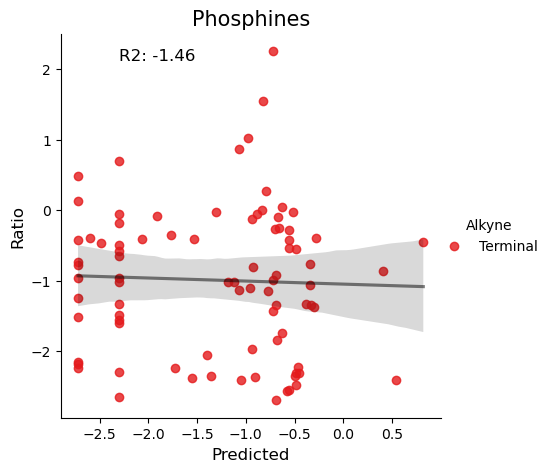

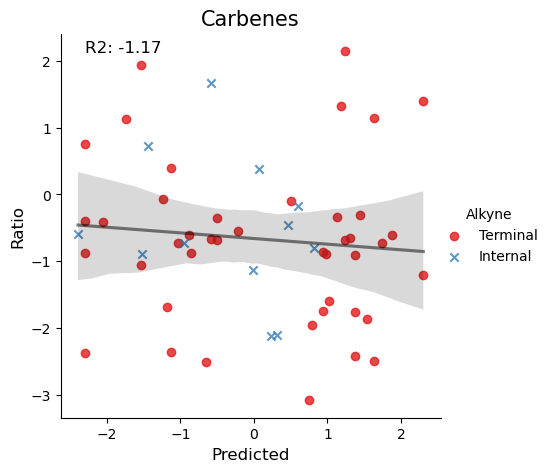

In [78]:
df_car = df[df['labels_type'] == 'Carbene']
r2_car = r2_score(df_car['ratio'], df_car['preds'])
df_phos = df[df['labels_type'] == 'Phosphi']
r2_phos = r2_score(df_phos['ratio'], df_phos['preds'])

# Phosphines
lm = sns.lmplot(x="ratio", y="preds", hue="labels", fit_reg=False, data=df_phos, 
                markers=["o"], palette="Set1", facet_kws={'legend_out': True})
ax = lm.axes
sns.regplot(x="ratio", y="preds", data=df_phos,
    ci=99, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][0])

ax[0][0].set_xlabel("Predicted", size = 12)
ax[0][0].set_ylabel("Ratio" , size = 12)
ax[0][0].set_title(f"Phosphines" , size = 15)
ax[0][0].text(-2.3, 2.3, f"R2: {round(r2_phos, 2)}", ha='left', va='top', size = 12)

box = ax[0][0].get_position()
ax[0][0].set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
new_labels = ["Terminal", "Internal"]
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)

# Carbenes
lm2 = sns.lmplot(x="ratio", y="preds", hue="labels", fit_reg=False, data=df_car, 
                markers=["o", "x"], palette="Set1", facet_kws={'legend_out': True})
ax = lm2.axes
sns.regplot(x="ratio", y="preds", data=df_car,
    ci=99, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][0])

ax[0][0].set_xlabel("Predicted", size = 12)
ax[0][0].set_ylabel("Ratio" , size = 12)
ax[0][0].set_title(f"Carbenes" , size = 15)
ax[0][0].text(-2.3, 2.3, f"R2: {round(r2_car, 2)}", ha='left', va='top', size = 12)

box = ax[0][0].get_position()
ax[0][0].set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm2._legend.set(title='Alkyne')
new_labels = ["Terminal", "Internal"]
for t, l in zip(lm2._legend.texts, new_labels):
    t.set_text(l)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


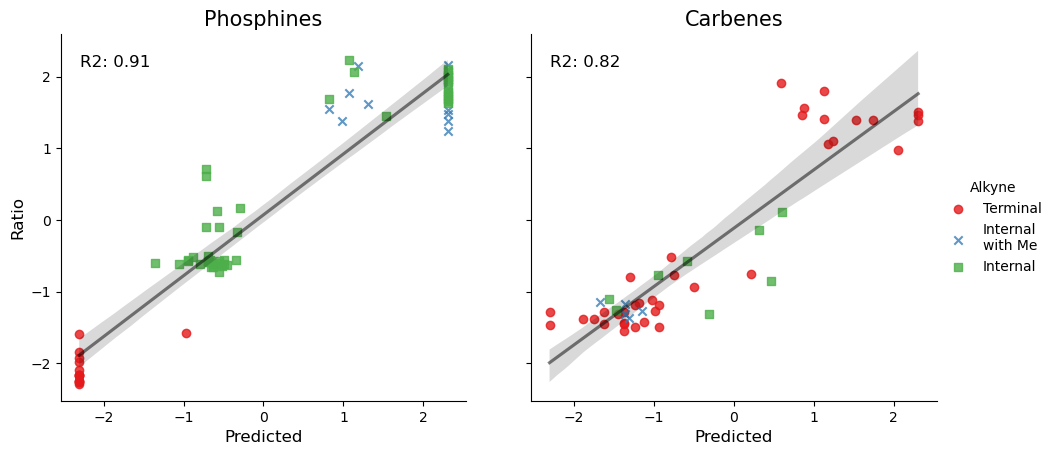

In [9]:
lm = sns.lmplot(x="ratio", y="preds", col="labels_type", hue="labels", fit_reg=False, 
           data=df, markers=["o", "x", "s"], palette="Set1", facet_kws={'legend_out': True})
ax = lm.axes

df_car = df[df['labels_type'] == 'Carbene']
r2_car = r2_score(df_car['ratio'], df_car['preds'])
df_phos = df[df['labels_type'] == 'Phosphi']
r2_phos = r2_score(df_phos['ratio'], df_phos['preds'])

sns.regplot(x="ratio", y="preds", data=df_phos,
    ci=99, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][0])
sns.regplot(x="ratio", y="preds", data=df_car,
    ci=99, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][1])

ax[0][0].set_xlabel("Predicted", size = 12)
ax[0][1].set_xlabel("Predicted", size = 12)
ax[0][0].set_ylabel("Ratio" , size = 12)
ax[0][1].set_ylabel("Ratio" , size = 12)
ax[0][0].set_title(f"Phosphines" , size = 15)
ax[0][1].set_title(f"Carbenes" , size = 15)
ax[0][0].text(-2.3, 2.3, f"R2: {round(r2_phos, 2)}", ha='left', va='top', size = 12)
ax[0][1].text(-2.3, 2.3, f"R2: {round(r2_car, 2)}", ha='left', va='top', size = 12)
box = ax[0][0].get_position()
ax[0][0].set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
box = ax[0][1].get_position()
ax[0][1].set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
lm._legend.set(title='Alkyne')
new_labels = ["Terminal", "Internal\nwith Me", "Internal"]
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


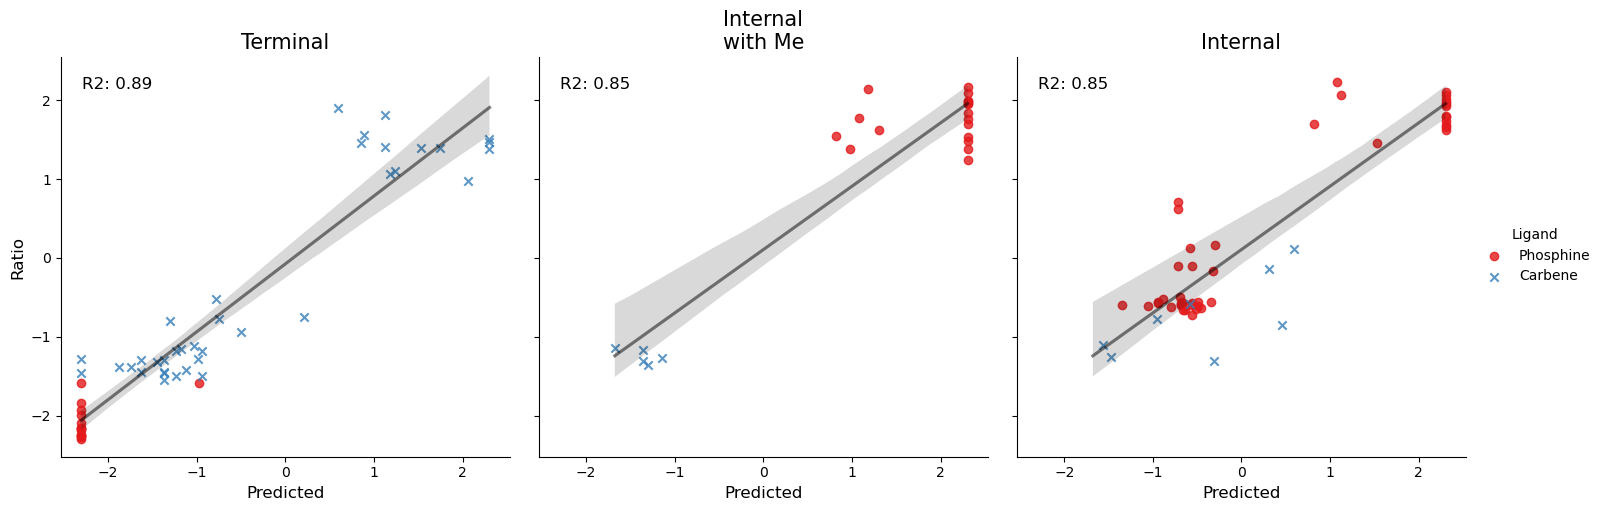

In [153]:
lm = sns.lmplot(x="ratio", y="preds", col="labels", hue="labels_type", fit_reg=False, 
                data=df, markers=["o", "x"], palette="Set1")
ax = lm.axes

df_0 = df[df['labels'] == 0]
r2_0 = r2_score(df_0['ratio'], df_0['preds'])
df_1 = df[df['labels'] == 1]
r2_1 = r2_score(df_1['ratio'], df_1['preds'])
df_2 = df[df['labels'] == 1]
r2_2 = r2_score(df_2['ratio'], df_2['preds'])

sns.regplot(x="ratio", y="preds", data=df_0,
    ci=95, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][0])
sns.regplot(x="ratio", y="preds", data=df_1,
    ci=95, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][1])
sns.regplot(x="ratio", y="preds", data=df_2,
    ci=95, marker="", color=".3", line_kws=dict(color="black", alpha=0.5), ax=ax[0][2])


ax[0][0].set_xlabel("Predicted", size = 12)
ax[0][1].set_xlabel("Predicted", size = 12)
ax[0][2].set_xlabel("Predicted", size = 12)
ax[0][0].set_ylabel("Ratio" , size = 12)
ax[0][1].set_ylabel("Ratio" , size = 12)
ax[0][2].set_ylabel("Ratio" , size = 12)
ax[0][0].set_title(f"Terminal" , size = 15)
ax[0][1].set_title(f"Internal\nwith Me" , size = 15)
ax[0][2].set_title(f"Internal" , size = 15)
ax[0][0].text(-2.3, 2.3, f"R2: {round(r2_0, 2)}", ha='left', va='top', size = 12)
ax[0][1].text(-2.3, 2.3, f"R2: {round(r2_1, 2)}", ha='left', va='top', size = 12)
ax[0][2].text(-2.3, 2.3, f"R2: {round(r2_2, 2)}", ha='left', va='top', size = 12)
box = ax[0][0].get_position()
ax[0][0].set_position([box.x0, box.y0, box.width * 0.98, box.height * 0.98])
box = ax[0][1].get_position()
ax[0][1].set_position([box.x0, box.y0, box.width * 0.98, box.height * 0.98])
box = ax[0][2].get_position()
ax[0][2].set_position([box.x0, box.y0, box.width * 0.98, box.height * 0.98])
lm._legend.set(title='Ligand')
new_labels = ["Phosphine", "Carbene"]
for t, l in zip(lm._legend.texts, new_labels):
    t.set_text(l)

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


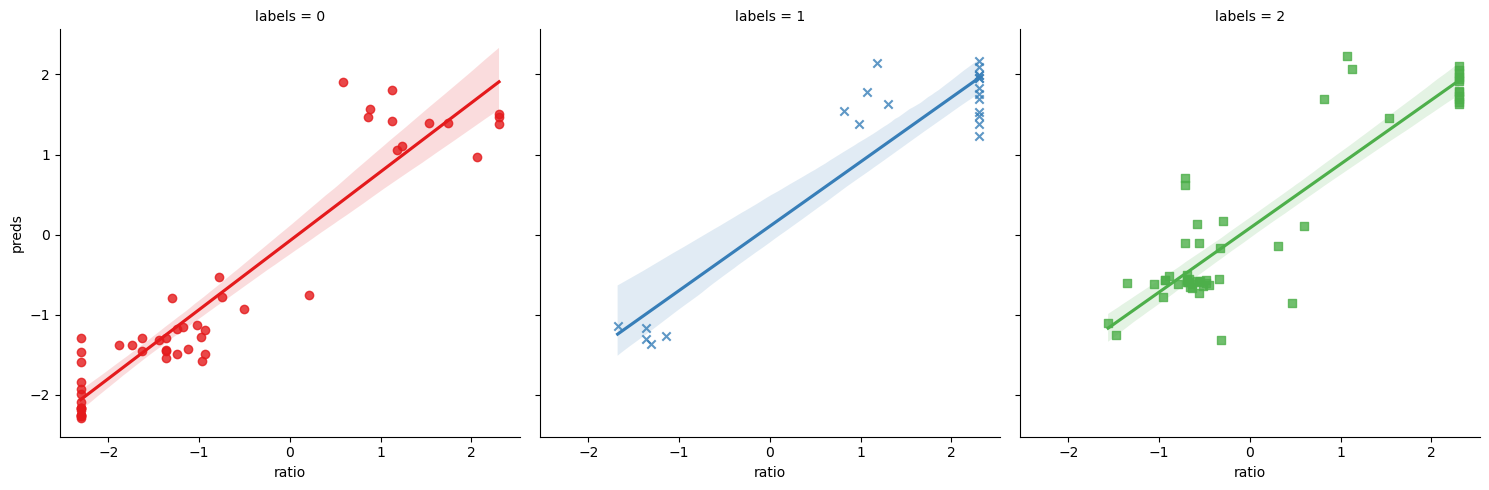

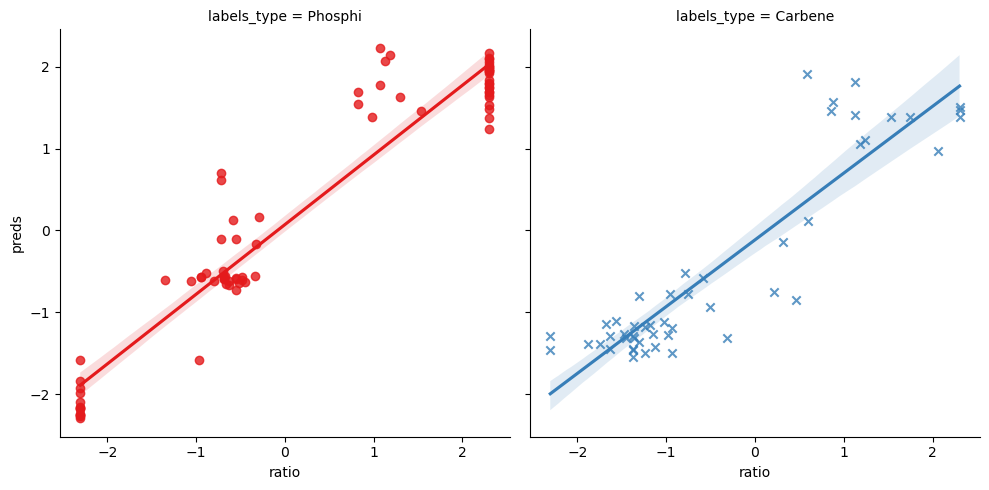

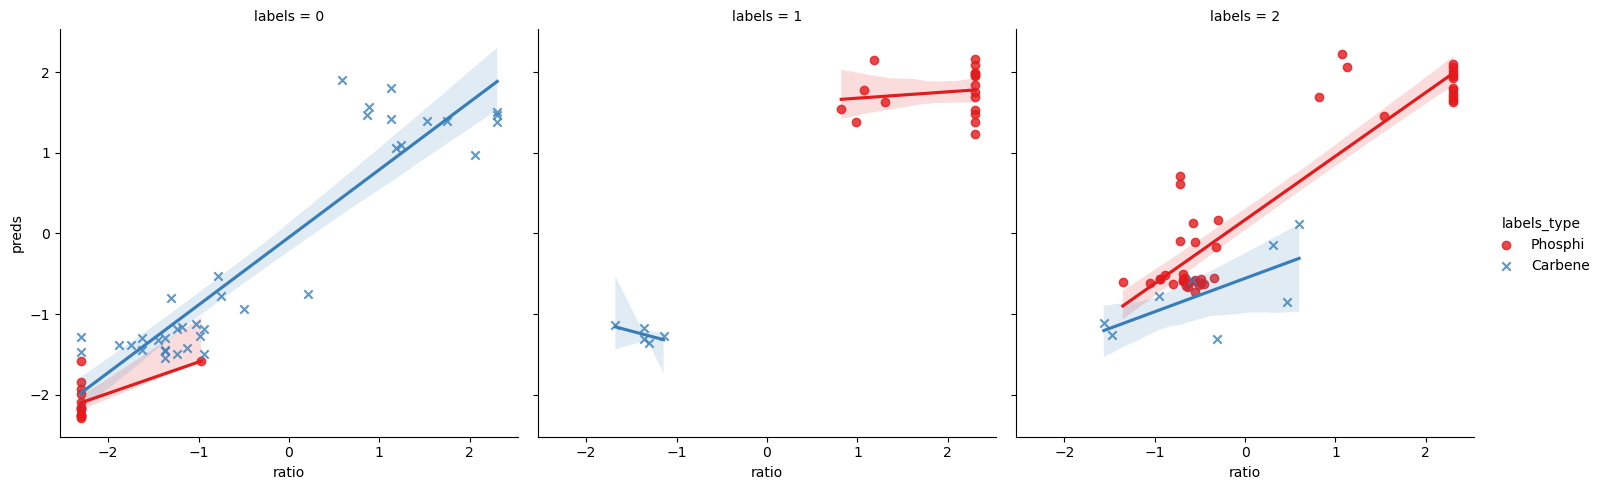

In [65]:
sns.lmplot(x="ratio", y="preds", col="labels", hue="labels", data=df, markers=["o", "x", "s"], palette="Set1")
sns.lmplot(x="ratio", y="preds", col="labels_type", hue="labels_type", data=df, markers=["o", "x"], palette="Set1")
sns.lmplot(x="ratio", y="preds", col="labels", hue="labels_type", data=df, markers=["o", "x"], palette="Set1")

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


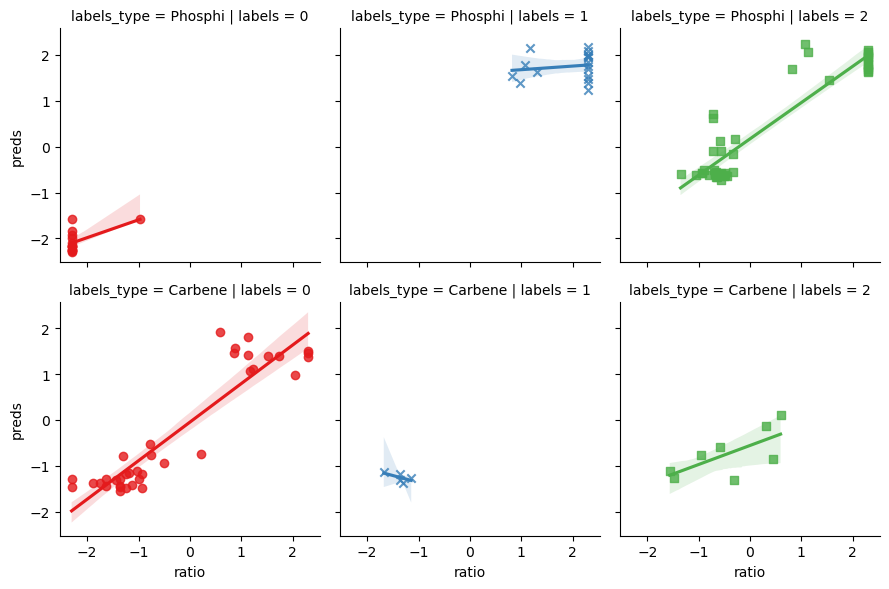

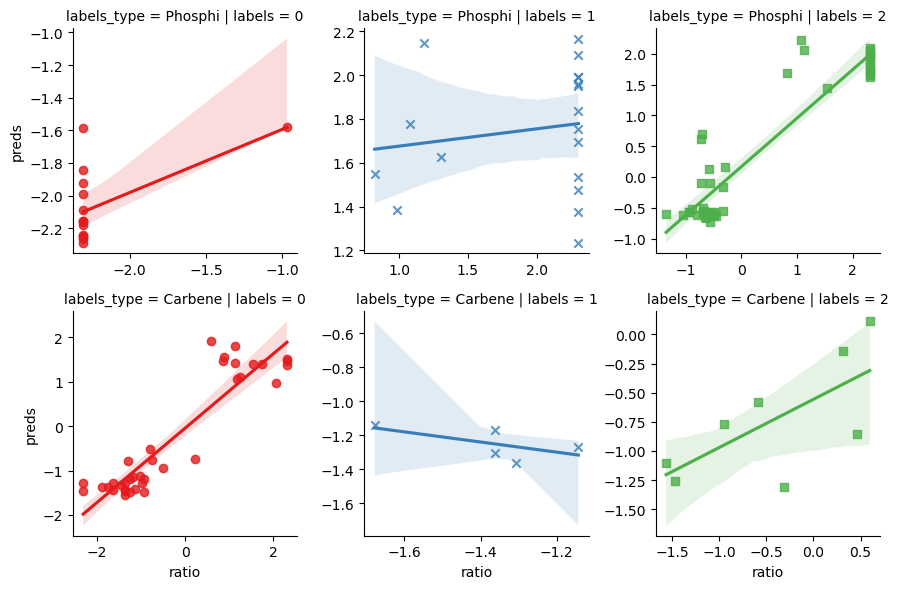

In [36]:
sns.lmplot(x="ratio", y="preds", col="labels", row="labels_type", hue="labels", 
           data=df, height=3, markers=["o", "x", "s"], palette="Set1")
sns.lmplot(x="ratio", y="preds", col="labels", row="labels_type", hue="labels",
           data=df, height=3, markers=["o", "x", "s"], palette="Set1",
           facet_kws=dict(sharex=False, sharey=False))

C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Quesada\Miniconda3\envs\molecule\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


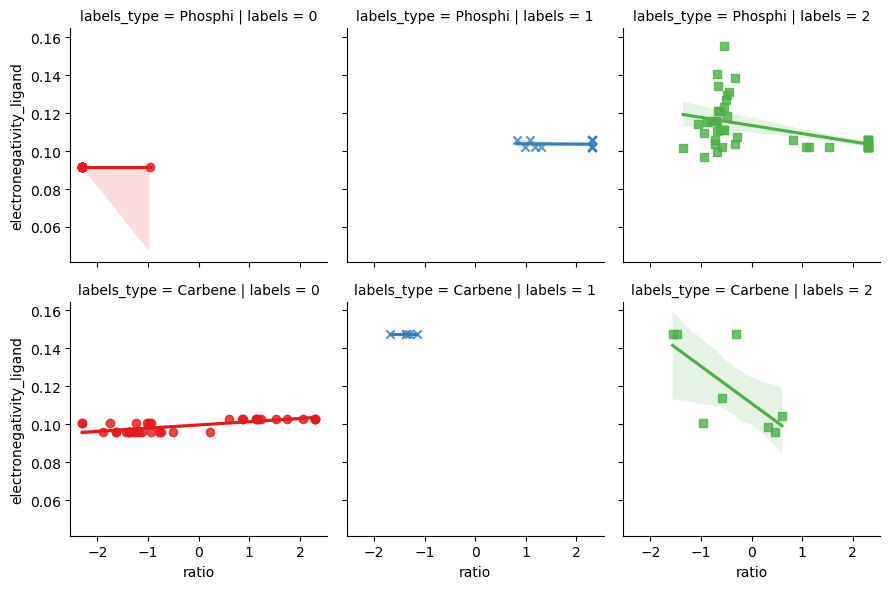

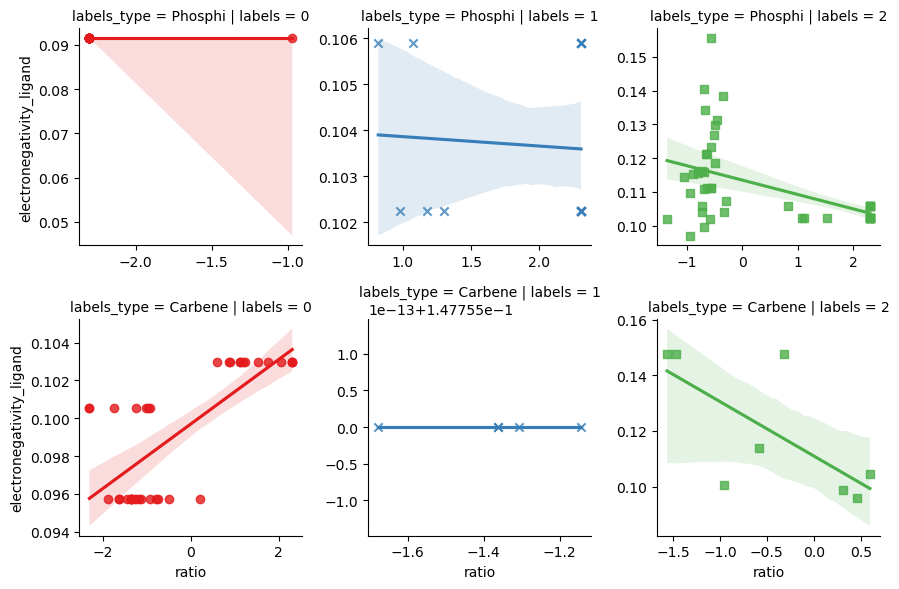

In [37]:
sns.lmplot(x="ratio", y="electronegativity_ligand", col="labels", row="labels_type", hue="labels", 
           data=df, height=3, markers=["o", "x", "s"], palette="Set1")
sns.lmplot(x="ratio", y="electronegativity_ligand", col="labels", row="labels_type", hue="labels",
           data=df, height=3, markers=["o", "x", "s"], palette="Set1",
           facet_kws=dict(sharex=False, sharey=False))

In [120]:
lm.get_legend()

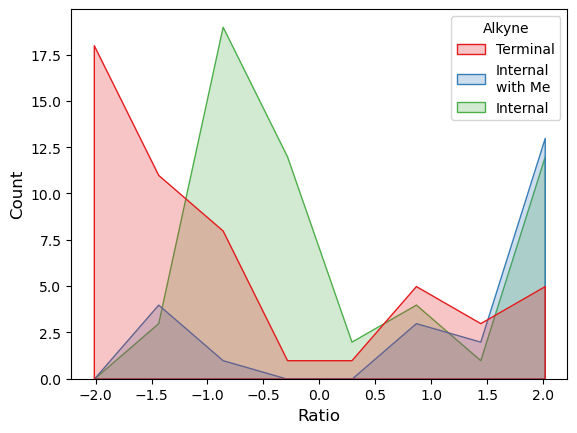

In [10]:
lm = sns.histplot(data=df, x="ratio", hue="labels", multiple="layer", 
                  element="poly", kde=False, palette="Set1")#sns.color_palette())
lm.set_xlabel("Ratio", size = 12)
lm.set_ylabel("Count", size = 12)
legend = lm.get_legend()
legend.set_title('Alkyne')
new_labels = ["Terminal", "Internal\nwith Me", "Internal"]
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)

R2 score: 0.8914839936572672


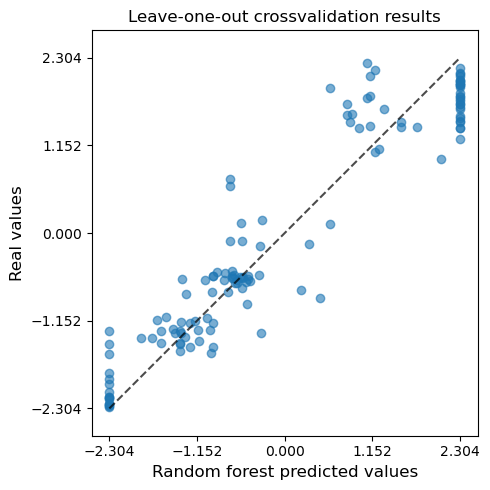

In [132]:
def error_plot(orig, preds, label):
    _, ax = plt.subplots(figsize=(5, 5))
    display = PredictionErrorDisplay.from_predictions(
        preds, orig, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.6}
    )
    ax.set_title("Leave-one-out crossvalidation results", size = 12)
    ax.set_xlabel(f'{label} predicted values', size = 12)
    ax.set_ylabel(f'Real values', size = 12)
    #for name, score in scores.items():
    #    ax.plot([], [], " ", label=f"{name}: {score}")
    #ax.get_legend().remove()
    #ax.legend(loc="upper left")
    plt.tight_layout()
    #plt.savefig("yield_pred.pdf")

preds = [-0.6639697370402357, -0.8303798105316667, -0.7298531501380138, -0.5845944601578134, 1.6980884308498325, -0.6161690911629165, -0.6199726405492673, -0.6416414909356973, -0.5642745496433764, -0.7187774886820134, 0.6414395127113621, -0.5249805162985612, -0.603186408514354, -0.5810377485409403, -0.6713382008356095, -0.5950394005498686, -0.5367575196379821, -0.737629671883372, 0.6162215712167124, -0.2466696118269553, -0.6321514953786104, 0.8314617233430529, 1.01010532098853, 0.22711444293133598, -0.6110082202165285, -0.5435103181328453, -0.5282063582780779, -0.9785657241413491, -0.7421163713858535, -0.6630066127620943, -0.5150741715866219, -0.4934791340747256, -0.6112823673645337, -0.4825241087277438, -0.5656733493470348, -1.4744827237974207, -1.1820831356425132, -1.3456290736954502, -1.5038746889245418, -0.44433713449103784, -0.6904404012365374, -1.3937689680533625, -1.558133646902571, -0.29443515343329135, -1.4112132410296827, -1.4129940259671003, -1.3605731782827724, -1.3697720644668159, -1.4419713029683503, -0.6633846565180421, -0.8170297519279646, -1.3708307230129244, -1.3623193649216971, -1.566552339415889, -1.2647782663403175, -1.735934901275538, -1.9565740161760807, -1.7711552387090146, 1.3794139872032516, 1.652210399848655, 1.2956173317329964, 1.3715309150495876, 1.346413577091986, 1.9614048206180854, 1.668061913934511, 1.5313693093319278, 1.7564003172559628, 1.2955524409439287, 1.2894040487966, 1.5660708990423367, 1.5003760483712836, 1.5372549779170988, 1.5938535809105052, 1.5748343404222844, 2.1060050416831335, 1.673152912256784, 1.559417388279596, 1.9793219888772764, 1.8137120649662053, 1.7610969369432143, 1.1312698117826576, 2.0508685531468687, 1.7257429173552163, 1.9196089596126742, 2.076301386930875, 2.1150108636581817, 1.7735936584586878, 2.1589845194040174, 2.1958956185285907, 1.835354222272453, 1.4069440166950584, 1.8869756845674341, 1.556642796806904, 1.8153403992761832, 1.8219549590799518, 2.0574829389598253, 1.9032237839354735, 2.134783013659505, 2.0135812852702797, 1.6622037833392185, 1.9023804725624907, 1.7038830317243472, 1.6727394398323052, 1.8763211858674482, 2.154214602254127, -2.22189650790152, -2.0100955201629955, -1.7239958983185426, -1.9415330532163155, -2.3005687875266667, -1.9473184809454116, -1.5755930835798941, -2.2824942114055555, -2.2708062410343355, -1.90862929176047, -2.2182983031133334, -2.2740788235815685, -1.3737502228087566, -2.1566795403212695, -2.2045106213552526, -0.9109133563421273, -1.3555983465359935, -1.0456852578120508, -1.2086836619412695, -1.3481814837821429, -0.8854757929361902, -1.3043277775074515, -1.2964486188873594]
preds = [-0.3793578211269434, -1.0242269163915874, -0.6543689649934572, -0.5276556686286076, 1.3981723873500953, -0.17458638210791141, -0.11187875671138303, -0.6443618453760245, -0.5573820886677685, -0.8596568984389865, -0.1975843377759127, -0.5541747616912778, -0.6594671351712862, -0.6551405106611681, -0.33101096361211996, -0.1599261554453088, -0.5871128789513673, -0.6943386324255283, 0.5065420572974604, -0.8344474683622092, -0.6987304379404953, 0.1166931212870014, 0.00797883488679334, 0.08024304700198051, -0.5645729428475685, -0.6430049152962705, -0.5741743330087699, -0.12476615244665323, -0.6904496880250526, -0.6383097366061232, -0.584966027095174, -0.5252406790504762, -0.6638745463222658, -0.48082736425695166, -1.247876747871252, -1.346372664480541, -1.410955138030119, -1.470859183590754, -1.4605873723684613, -0.42728806187299784, -0.7644703369644172, -1.4561388526115784, -1.5467393469214286, -0.45556124431880535, -1.426673356284451, -1.4288376463720236, -1.3635048214724264, -1.480314279628265, -1.394128531354497, -1.1533840040725771, -0.8782510853497923, -1.316146024656617, -1.5671027727723736, -1.0238357912262699, -1.5273484442609522, -1.4795068987800215, -1.6731648254444444, -1.4828337946790042, 1.2798024604206366, 1.6114175691694341, 1.0410209157532395, 1.079124044119353, 1.3726727996899133, 1.5097103698667027, 1.23137627396326, 1.4966125637703833, 1.6976683414404001, 1.2583521020126427, 1.7201404875410677, 1.5471612136354986, 1.4120810477068746, 1.279355005136169, 1.252699144112558, 0.9457450271064467, 1.8944395436143278, 1.6102058361381413, 2.0075145239259284, 1.8879430961762906, 2.1290265424798664, 1.902931295108819, 1.4935899159752914, 2.085451477672976, 1.9236354156819613, 1.7765354945175438, 1.9842779430627377, 1.8592890368786452, 1.7487420407773897, 2.0962061895058617, 2.0135925106843446, 1.77277606154211, 1.2304883672847915, 1.9251319372873001, 1.4540620346544944, 1.6473942913733126, 1.5497488841290161, 1.754546491308173, 1.0570282799259236, 1.9739498138559521, 1.8124260901956937, 1.3173901437171165, 2.09890640182864, 1.935730707696408, 1.8692321580801223, 1.987359954238182, 2.1075224352590682, -2.151096433276746, -1.9676183601214714, -1.7557957189779487, -2.1454950895042857, -2.26618401454576, -2.009841748452727, -1.627980237539163, -2.1735562451816666, -2.266377807598674, -1.9332305919114483, -2.304308355, -2.2473658409867685, -1.8478129513671924, -2.259557816542851, -2.25735313823691, -0.7123630140523989, -1.1937832402011364, -1.1633667130769445, -1.2410564990145179, -1.2344160149364174, -1.1008895360149626, -1.252546479997381, -1.257610025767478]
preds = [-0.563428312531807, -0.772197742951682, -0.8519314337530872, -0.6090731387603432, 0.6174312582005723, -0.5943182845730555, -0.4988911920090729, -0.6598116631514781, -0.6296868673984874, -0.6142446124346919, 0.12802151026172043, -0.5145876618016233, -0.6208988895556079, -0.5546691093253839, -0.5931953003726514, -0.10134464405792487, -0.577387649288895, -0.5697421849083442, 0.11332406213660402, -0.5992310046882348, -0.5796618039651993, 0.1693347935132702, 0.7064943500613298, -0.16858799889904388, -0.7274618260166109, -0.567111771745705, -0.09984015073615443, -0.14263677636760713, -0.6561219514206522, -0.6420904142300541, -0.5526643517428932, -0.5631718374845611, -0.6125984028674458, -0.5926349053153951, -1.1550111278042317, -1.2912152240251682, -1.2904070984982312, -1.4409759819008197, -1.4912391167761547, -0.9329014521283441, -0.7502585656307402, -1.4473217723051157, -1.491690843314256, -0.5222154111308417, -1.4244560392717773, -1.4537214001640717, -1.3798601886689934, -1.5442473070783231, -1.3168449457095832, -0.7954620760238308, -0.7732731164685365, -1.1804744758560484, -1.2769845237747437, -1.1222327318110779, -1.1844091181251923, -1.2835090698925091, -1.3811359837391666, -1.4632353258152309, 1.5624020218338501, 1.462653123477337, 1.101380282037376, 1.0602078354883218, 1.4124130430890496, 1.9060004393042782, 1.8056318326421679, 1.3898143716769766, 1.3894249525683373, 0.9743343331014753, 1.3808860165530659, 1.464456864006704, 1.506386703965373, 1.376772043540672, 1.4776170814055747, 1.6927062478774466, 1.9485367727885852, 1.533984993758741, 1.920399213067031, 2.0600220448793114, 1.6918168029130953, 1.7759284778005355, 1.548091640039179, 1.9703450443643309, 1.6891224178089677, 1.6575039420211972, 1.9459524175120806, 2.1007012920812054, 1.4521685040685222, 2.068535832688052, 2.227759582864862, 2.0162609332530517, 1.3853337903490848, 1.7829256130740803, 1.7331444368255844, 1.7981451390463459, 1.6278211695368205, 1.7547767544634034, 2.0907040449910665, 2.167010767792559, 1.9933968026339037, 1.2349947031804347, 1.9577712263972171, 1.9933729795832005, 1.6250720409545534, 1.8343888226564133, 2.145370039963069, -2.157262650845873, -2.089061302560195, -1.9235479660459092, -1.8412458620343628, -2.164896121022619, -1.58245360077974, -1.9882936801539746, -2.244380822580736, -2.2662980814833333, -2.1593297678274603, -2.289896798582843, -2.183044590159226, -1.5854166442259097, -2.2466263124166668, -2.2566857633214283, -1.1671592267964483, -1.2681537522569613, -1.1401015627532538, -1.25674420710873, -1.3111974173634127, -1.1074351296664684, -1.307264978253968, -1.3628384644303178]
error_plot(df['ratio'], preds, 'Random forest')
print(f'R2 score: {r2_score(df["ratio"], preds)}')

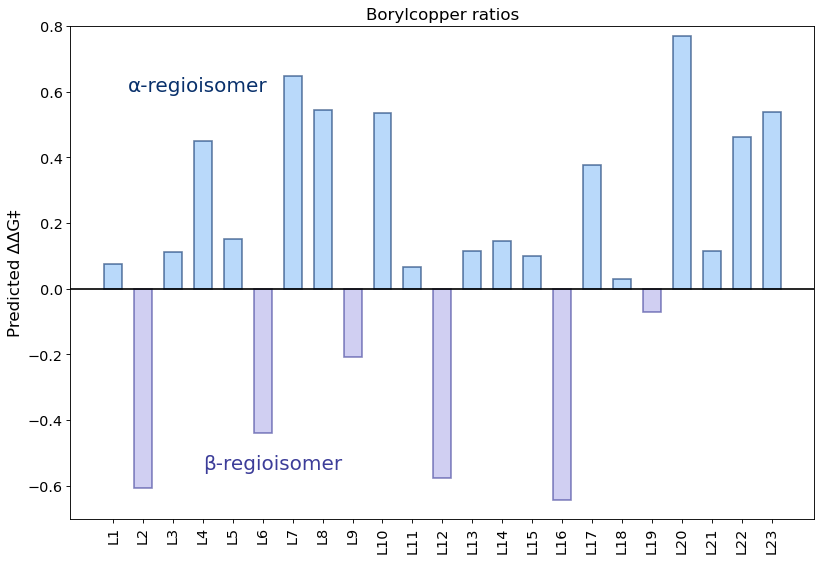

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# Tamaño de la figura en pulgadas 
figure(figsize=(12, 8), dpi=80)
r1 = [0.076277503,-0.608005457,0.111057808,0.448337216,0.152210336,-0.43997,0.646298756,0.54542012,-0.20723091,0.5358158,0.066733907,-0.574982115,0.116381873,0.145189048,0.101174802,-0.643593327,0.37747219,0.031108289,-0.071954089,0.769397817,0.115512904,0.46203976, 0.53670818]
ratio = np.array(r1)                

n = len(ratio)
plt.xticks(rotation=90)

# Colores de las barras y de las líneas de las barras
colors = np.array(['#8BC1F7'] * n)
colors[ratio < 0] = '#B2B0EA'
l_colors = np.array(['#08306b'] * n)
l_colors[ratio < 0] = '#3C3D99'
#ratio = [x * 100 for x in ratio]  # Ratio multiplicado por 100
ligand = ["L" + str(i+1) for i in range(n)]
ind = np.arange(n) 
width = 0.60

p1 = plt.bar(ind, ratio, width, color=colors, edgecolor=l_colors, alpha=0.6, linewidth=1.5)
plt.axhline(y=0, color='black', linestyle='-')

# Tamaños de las fuentes
plt.ylabel('Predicted ΔΔG‡', fontsize=15)
plt.title('Borylcopper ratios', fontsize=15)
plt.xticks(ind, ligand, fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([-0.70,0.80])

# Texto alfa-beta
ax = plt.gca()
ax.annotate('α-regioisomer', (0.5, 0.6), fontsize=18, color='#08306b')
ax.annotate('β-regioisomer', (3.0, -0.55), fontsize=18, color='#3C3D99')

plt.show()

In [38]:
import plotly.express as px

#  x='electronegativity_ligand', y='dipole_Emin_react', z='electrofug_Emin_react'

fig = px.scatter_3d(df, x='nucleofug_Boltz_ligand', y='dipole_Emin_react', z='HOMO_Boltz_react',
                    color='labels')#, symbol='labels_type')
fig.show()

In [3]:
import seaborn as sns
sns.color_palette("deep")
sns.color_palette("deep").as_hex()
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


C:\Users\Quesada\AppData\Local\Temp\ipykernel_9904\2720089188.py:23: UserWarning: The label '_noname' of <matplotlib.lines.Line2D object at 0x0000012FEB066310> starts with '_'. It is thus excluded from the legend.
  ax.legend(['_noname', 'Literature', 'Experimental'])


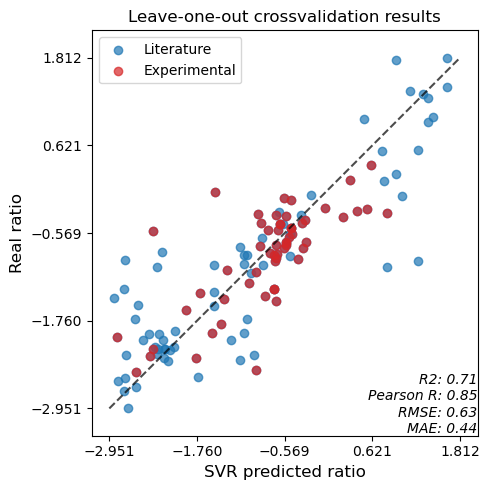

C:\Users\Quesada\AppData\Local\Temp\ipykernel_9904\2720089188.py:23: UserWarning: The label '_noname' of <matplotlib.lines.Line2D object at 0x0000012FEA9C0760> starts with '_'. It is thus excluded from the legend.
  ax.legend(['_noname', 'Literature', 'Experimental'])


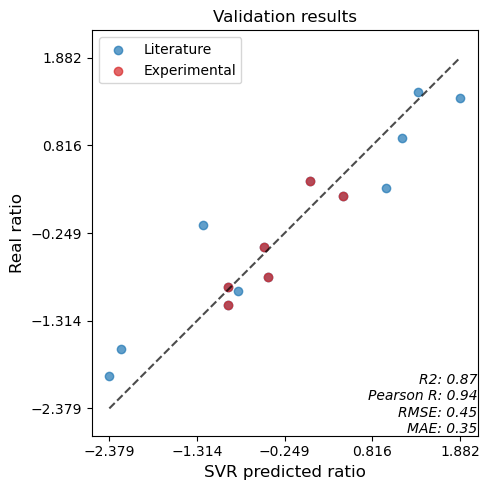

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import r_regression

def pearson_r(orig, preds):
    return r_regression(np.array(orig).reshape(-1, 1), preds)[0]

def error_plot(orig, preds, ours, label, title="Leave-one-out crossvalidation results"):
    _, ax = plt.subplots(figsize=(5, 5))
    display = PredictionErrorDisplay.from_predictions(
        preds, orig, kind="actual_vs_predicted", ax=ax, 
        scatter_kwargs={"alpha": 0.7, "color": sns.color_palette().as_hex()[0]}
    )
    ax.set_title(title, size=12)
    ax.set_xlabel(f'{label} predicted ratio', size=12)
    ax.set_ylabel(f'Real ratio', size=12)
    
    ours_ratio = np.array(orig)[[bool(x) for x in ours]]
    ours_preds = np.array(preds)[[bool(x) for x in ours]]
    ax.scatter(ours_ratio, ours_preds, color=sns.color_palette().as_hex()[3], alpha=0.7)
    ax.legend(['_noname', 'Literature', 'Experimental'])
    
    metrics_text = f"R2: {r2_score(orig, preds):.2f}\nPearson R: {pearson_r(orig, preds):.2f}\nRMSE: {np.sqrt(mean_squared_error(orig, preds)):.2f}\nMAE: {mean_absolute_error(orig, preds):.2f}"
    ax.text(1, 0, metrics_text, transform=ax.transAxes, ha='right', va='bottom', 
         style='italic')#, bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
    
    plt.tight_layout()
    plt.savefig(f"yield_pred_{title}.png")
    plt.show()
    
    
labels_loo = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
ratio_loo = [-2.12967583, -1.17969822, -0.48792538, -2.35263147, 1.62915688, -0.79740159, -2.74492124, -0.5889062, -2.33221813, -1.30095497, -2.59350018, -1.35213402, -0.69604536, -2.73571815, -0.88622512, 0.31245645, 0.54252669, -2.21453102, 1.62915688, -1.44091843, -1.53155321, -0.7180701, -0.48276945, -0.7180701, -0.90741178, -2.85115572, -0.55454819, 0.59761342, -0.57893, -1.17969822, -2.56377891, -1.1255389, 1.23790715, 1.1255389, -2.59068259, -1.55404035, -0.8585367, 0.93883424, -0.65854048, 0.50167669, -0.55554019, -1.53155321, -0.34472412, -0.96116406, -0.88319412, 0.78447525, -0.55554019, -2.69043563, 0.93883424, -0.71646783, -2.27315559, -2.19930722, -0.66924456, -2.60186912, -1.74337323, -1.05299001, -0.68121648, -2.23538525, -0.68777756, -1.07481526, -0.50167669, -1.1255389, -1.39783833, 1.02704015, -0.55554019, -2.7206219, 0.8208112, 1.30095497, 0.81346679, -0.98182046, -0.63324456, 1.23790715, -1.1255389, -2.75557275, -2.35343056, -0.33885347, -0.3862353, -0.48792538, -1.53155321, -2.06845065, -0.69135226, -1.07481526, -0.83543145, 0.74938856, -2.28599444, 1.36988039, -0.46952303, -1.02704015, 0.4104056, -2.83411214, -1.90586458, -2.30553285, -0.21550031, -2.73546406, 1.44608955, -2.88634951, 0.22834694, -0.28197355, -2.30795494, -0.63324456, -0.92999423, -0.65047748, -0.50167669, -0.01750147, 1.36988039, -0.51354049, -2.4939636, -0.77465094, -0.95319702, -0.29667252, -0.32647958, -2.15930644, -1.76779278, -2.0581637, -1.51868118, -1.72565982, -0.58393146, -2.22512573, -2.21061839, -0.68777756, -2.39334287, -2.41511714]
preds_loo = [-2.157062969977026, -0.7607940279588445, -0.5073346450734588, -0.5399310038878999, 1.81184587281434, -0.5230758061523062, -2.719727300180654, -0.4483932936662989, -2.121069195450132, -2.0189578341521335, -2.4554243274568908, -1.0699113779793206, -0.9528167678153019, -2.5353338417076046, -0.42813681834948425, 0.15722378868300613, -0.24186290857067383, -2.142974598586985, 1.4123953289613806, -1.8025208840276543, -1.370772036724707, -1.327427193248497, -0.11442243550837228, -1.3305931366159764, -0.7416469340894642, -1.9801530751492542, -0.3376716108058646, 0.35257847039548773, -0.08811191585460731, -2.2895052496949004, -1.5483348503860694, -1.9247959939047437, -0.9536892032018573, 1.3520598949913487, -2.6652336352448245, -1.931313676675606, -1.0058361601175703, 0.23444141606374558, -0.5254483973999067, 0.9730178217767569, -0.7291286465619291, -1.5582966252647616, -0.325901444306951, -2.425451413955643, -0.6320880842542425, 0.13627219835884952, -0.6939609631168664, -2.9505530698754967, 1.785201984730146, -0.8670122598334018, -1.9381835022264948, -2.1471755109046318, -0.8567726694302411, -1.7375619062983785, -2.5262688064034533, -1.2425325232440012, -0.7289849528535528, -0.8272845869364434, -0.3193581417290594, -0.869494524520183, -0.8788496897734941, -0.8640663963621176, -1.468642120082742, -0.07065458482626896, -0.7018297015584885, -2.2292732172763463, -1.0305266458317313, 1.3184316355582313, -0.2997849883755064, -2.2310027661542335, -0.44622886418031693, 0.5515820362760118, -0.9917283015176568, -1.3233254077950463, -2.1500920586775436, -0.4346163534002381, -0.926168817324198, -0.496559856970225, -1.0096235815811592, -2.1168175004509138, -1.4855219449345483, -1.7423914264500848, -1.4175872758599475, 0.550799313349772, -2.1457140713974363, 1.2622745844920122, -0.5799347838142188, -1.1076716195712821, -0.2748706537961172, -2.575703975395892, -1.615351306823614, -2.20613198768951, -0.05004987403422012, -0.9297766226565265, 1.005888477062508, -1.4546439181265687, -0.3509285943188538, -0.6878673466843788, -1.0277044247628384, -0.4494668143236886, -0.31522724656588164, -0.2804622820101268, -0.5879986851623267, -0.2317537671818224, 0.9324636483178963, -0.6205359840460867, -2.0240446422321376, -0.8362703784561294, -1.1022299292333255, -0.3930278411532113, -0.7672939257486495, -2.307378230933722, -2.264018922737728, -1.8938428199439938, -0.007713858070806934, -1.3895757774611683, -0.7714496429212216, -2.0152039138681044, -2.272042505467189, -0.9056947309595238, -2.2431312620732893, -1.9394544078948552]
error_plot(ratio_loo, preds_loo, labels_loo, 'SVR', title="Leave-one-out crossvalidation results")

labels_val = [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
ratio_val = [ 1.36988039, -2.37932628, -0.94015966,  0.06238292, -2.23223336, -1.23790715,  0.98182046, -0.8208112 , -0.94015966, -0.45255665, 1.88169428, -0.49572599,  0.458794,  1.17969822]
preds_val = [ 1.46691686, -1.983386  , -0.90615654,  0.38695278, -1.65768447, -0.15336919,  0.29459564, -0.95604966, -1.11719672, -0.78162136, 1.39118723, -0.4174138 ,  0.19782618,  0.91072892]
error_plot(ratio_val, preds_val, labels_val, 'SVR', title="Validation results")

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smiles = 'CC(Cl)CCl'
m = Chem.MolFromSmiles(smiles)

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

figure = SVG(moltosvg(m))
with open('output.svg', 'w') as f:            
    f.write(figure.data)